<a href="https://colab.research.google.com/github/bustanularifin666/MachineLearningTasks/blob/main/TaskWeek4/Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from ipywidgets import interact, widgets


In [3]:
from google.colab import drive
drive.mount('/content/drive')

data = '/content/drive/MyDrive/Dataset/diamonds.csv'

Mounted at /content/drive


In [4]:
# Membaca dataset menjadi dataframe
df = pd.read_csv(data)

# Sekarang, Anda dapat melakukan operasi dan analisis data pada 'df'.
print(df.head())

   Unnamed: 0  carat      cut color clarity  depth  table  price     x     y  \
0           1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98   
1           2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84   
2           3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07   
3           4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23   
4           5   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35   

      z  
0  2.43  
1  2.31  
2  2.31  
3  2.63  
4  2.75  


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [6]:
# Menghitung jumlah unique value untuk masing-masing fitur
unique_counts = ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y', 'z']

for unique_counts in unique_counts:
  print(f"Jumlah unique value for {unique_counts} : {df[unique_counts].nunique()}")

# Menampilkan hasil
#print(unique_counts)

Jumlah unique value for carat : 273
Jumlah unique value for cut : 5
Jumlah unique value for color : 7
Jumlah unique value for clarity : 8
Jumlah unique value for depth : 184
Jumlah unique value for table : 127
Jumlah unique value for price : 11602
Jumlah unique value for x : 554
Jumlah unique value for y : 552
Jumlah unique value for z : 375


In [7]:
# List fitur-fitur numerical
numerical_features = ['carat', 'depth', 'table', 'x', 'y', 'z']

# List fitur-fitur categorical
categorical_features = ['cut', 'color', 'clarity']

# Fitur target
target = ['price']

# Menampilkan hasil pengelompokkan
print("Numerical  : ", numerical_features)
print("categorical  : ", categorical_features)
print("Target  : ", target)

Numerical  :  ['carat', 'depth', 'table', 'x', 'y', 'z']
categorical  :  ['cut', 'color', 'clarity']
Target  :  ['price']


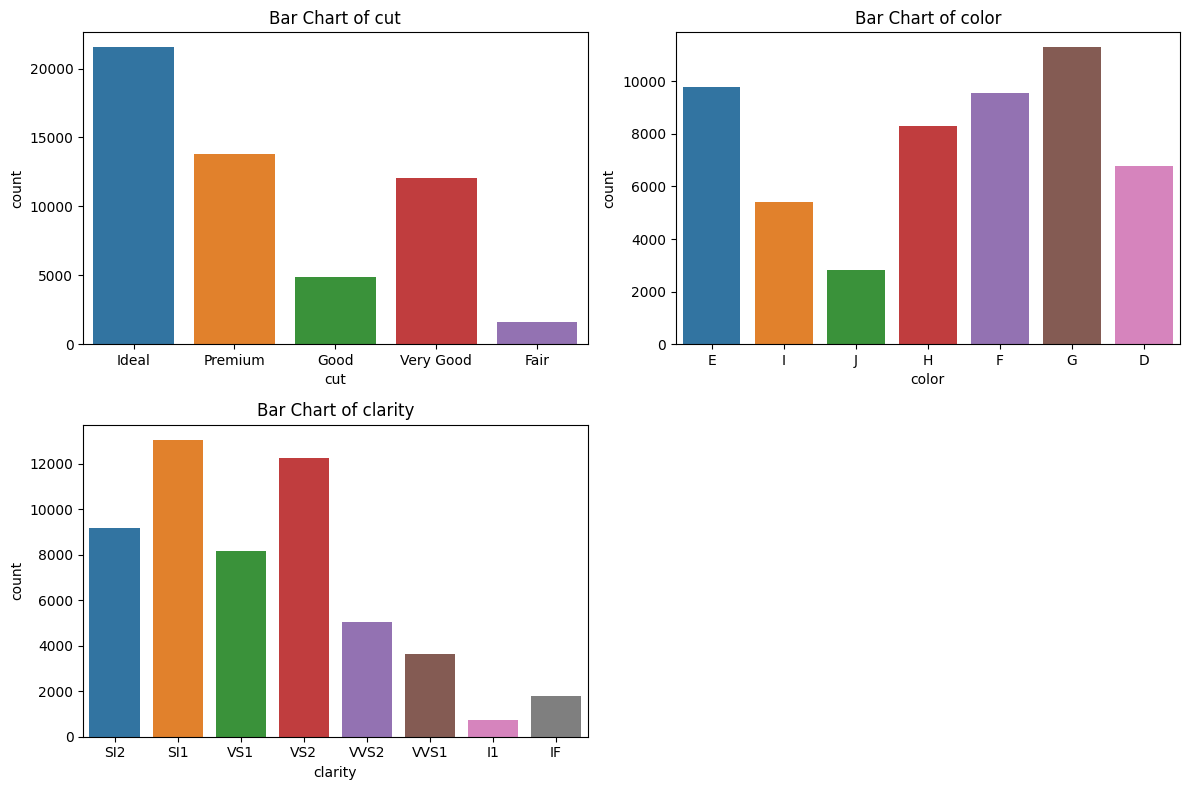

In [8]:
# Menghitung jumlah masing-masing kategori
category_counts = df[categorical_features].apply(lambda x: x.value_counts())

# Menentukan ukuran plot
plt.figure(figsize=(12, 8))

# Loop untuk membuat bar chart untuk setiap kolom kategorikal
for i, column in enumerate(category_counts.columns, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=column, data=df)
    plt.title(f'Bar Chart of {column}')

# Menampilkan plot
plt.tight_layout()
plt.show()

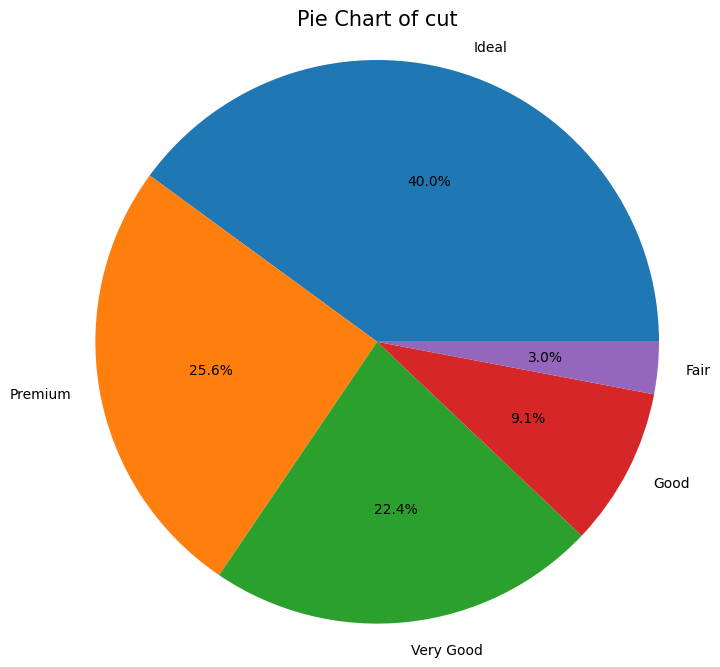

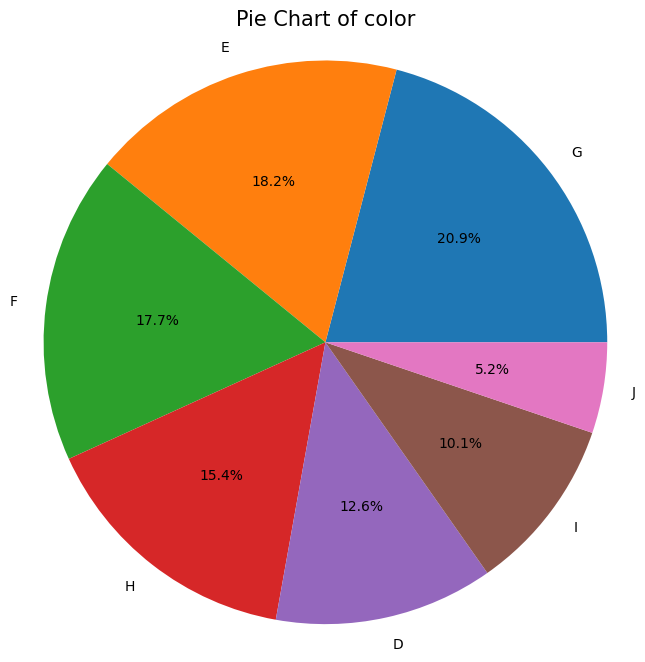

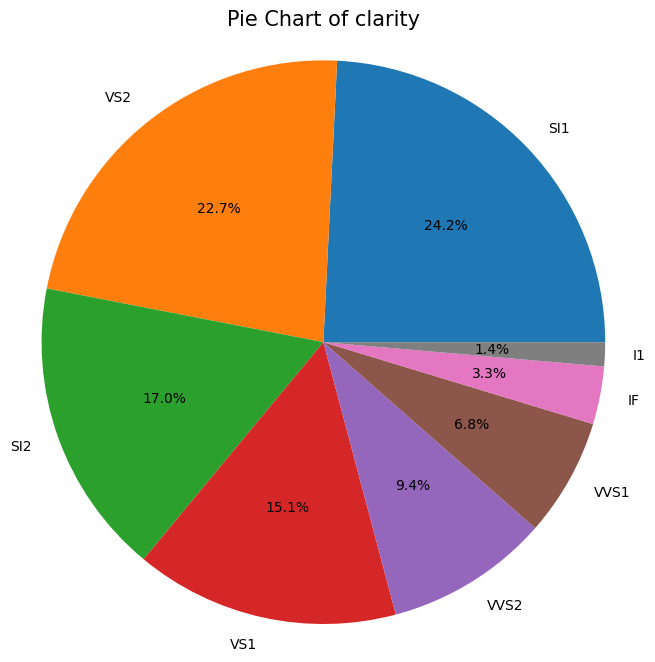

In [17]:
import matplotlib.pyplot as plt

# List fitur-fitur kategori
categorical_features = ['cut', 'color', 'clarity']

# Menghitung jumlah masing-masing kategori
category_counts = df[categorical_features].apply(lambda x: x.value_counts())

# Plot pie chart untuk masing-masing fitur kategori
for feature in categorical_features:
    plt.figure(figsize=(8, 8))
    df[feature].value_counts().plot(kind='pie', autopct='%1.1f%%')
    plt.title(f'Pie Chart of {feature}', size=15)
    plt.axis('equal')  # Mengatur aspek rasio agar menjadi lingkaran
    plt.ylabel('')
    plt.show()


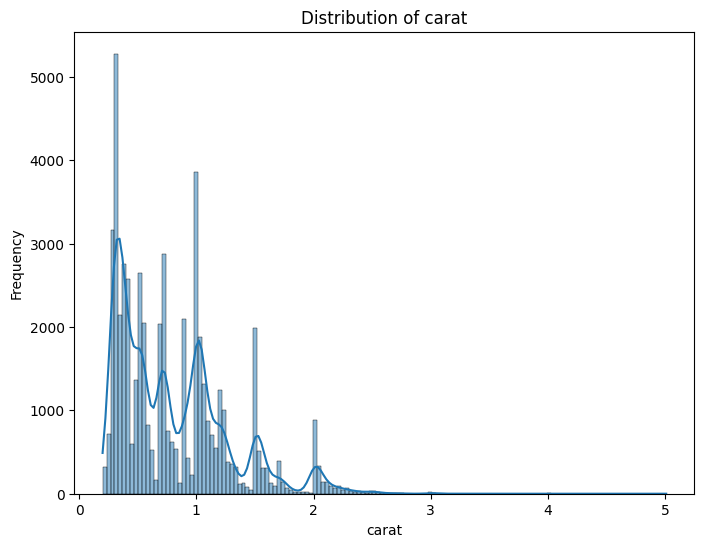

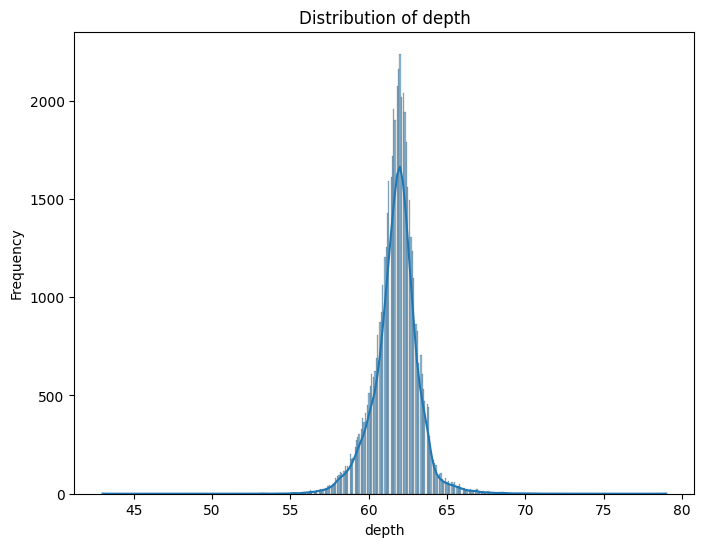

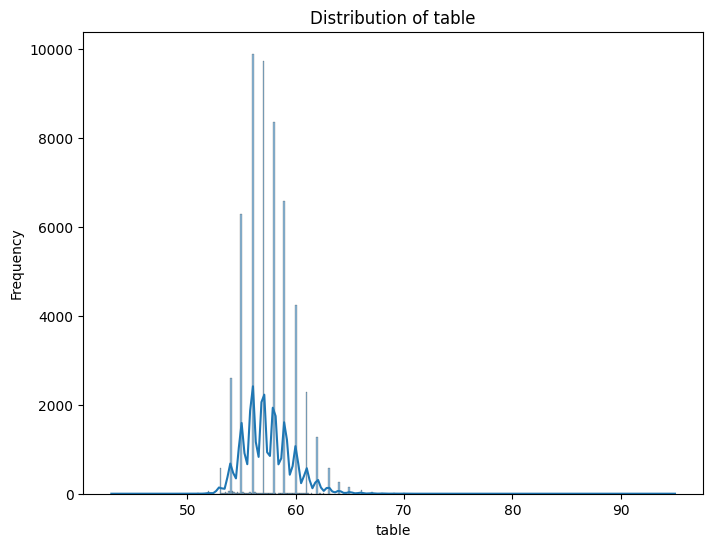

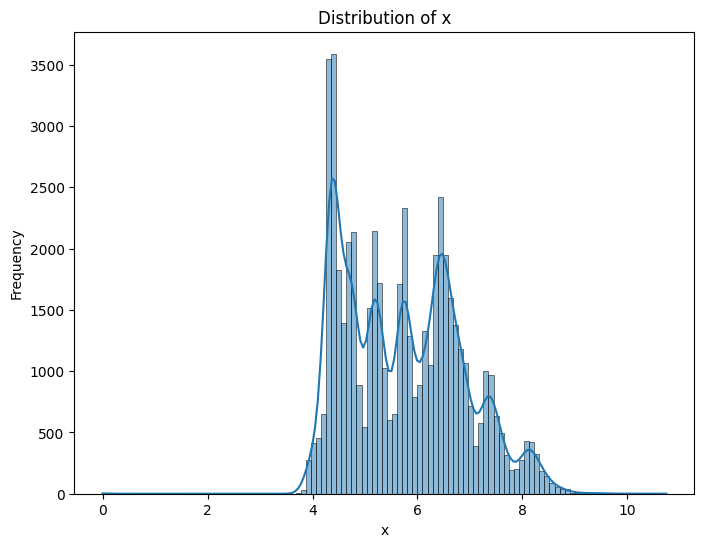

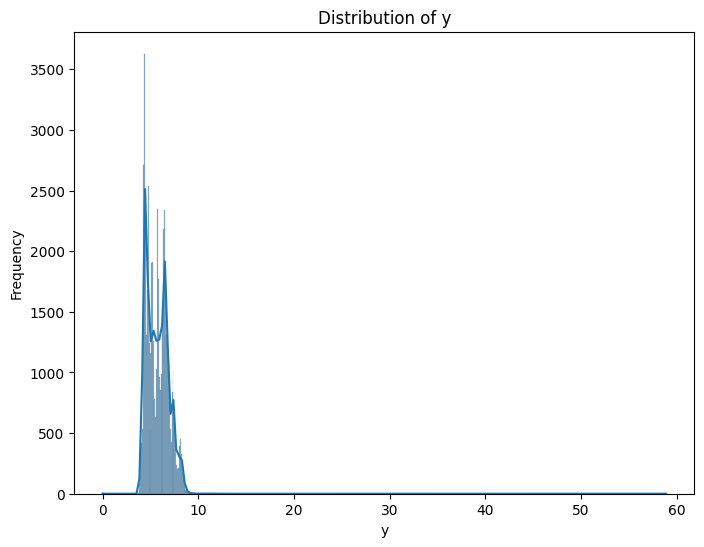

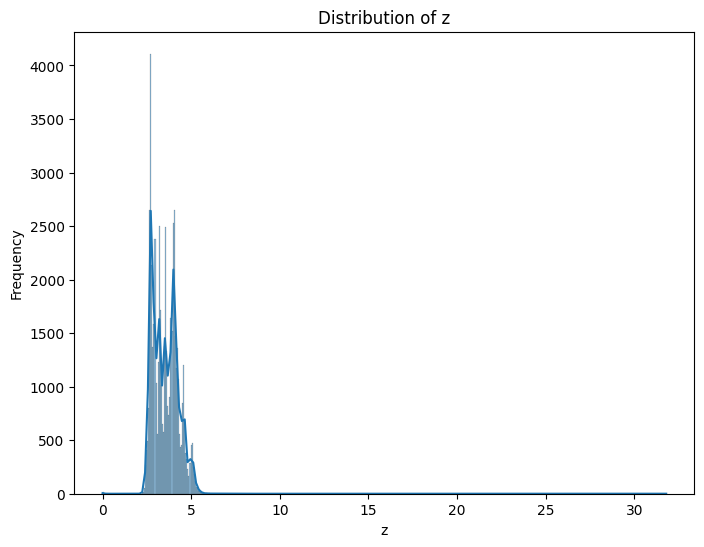

In [10]:
# Memplot histogram untuk masing-masing fitur numerical
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

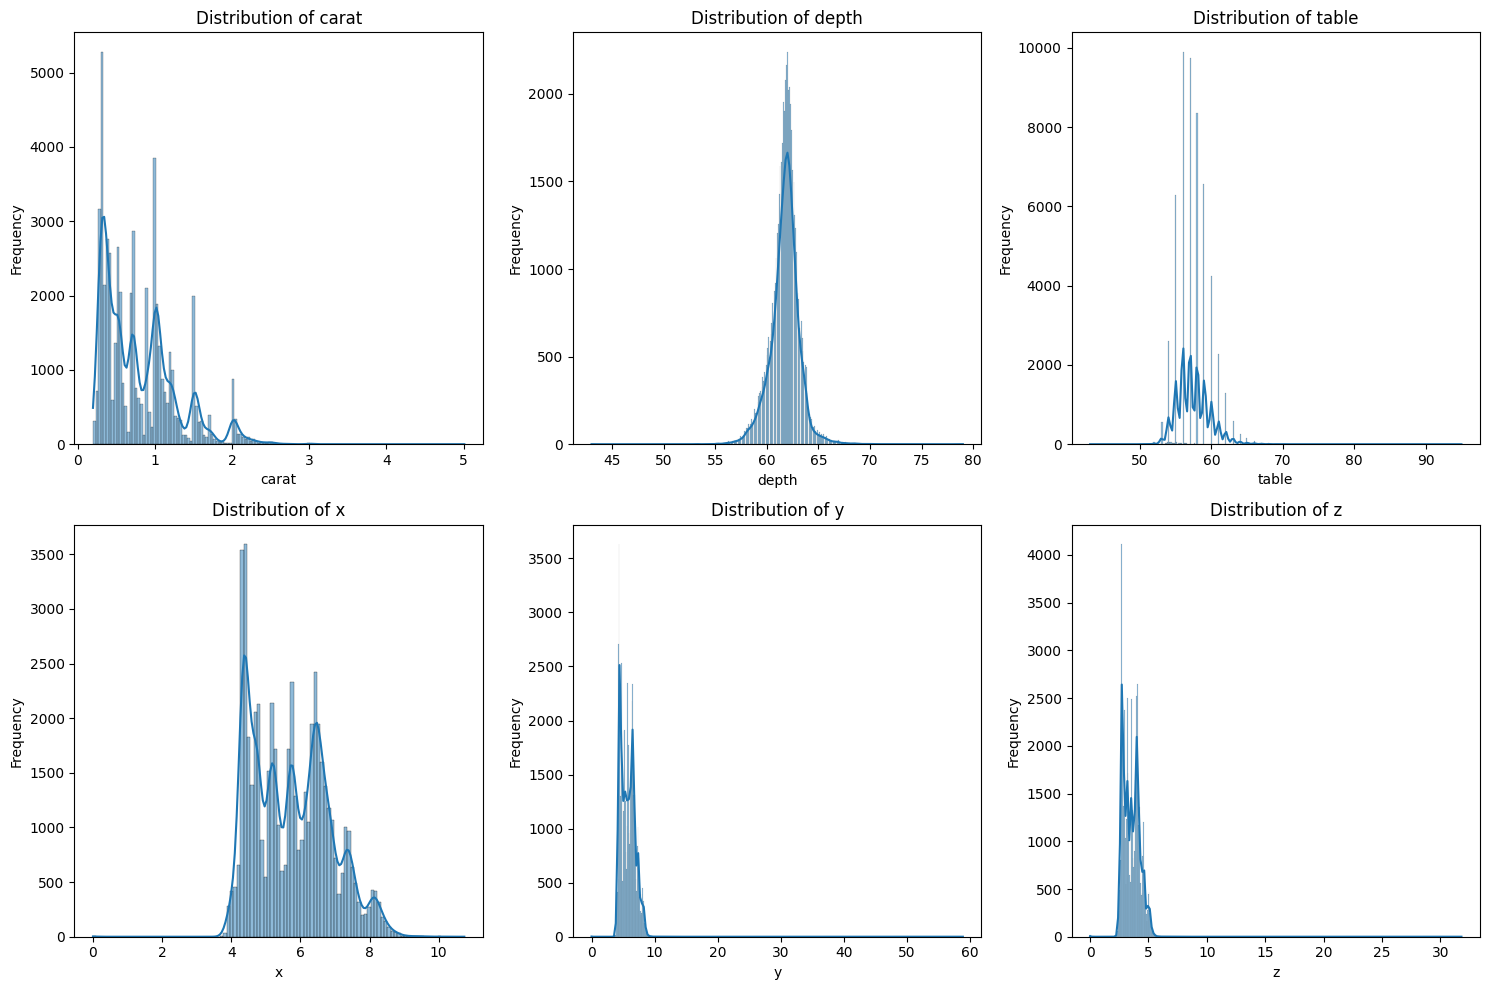

In [11]:
# Membuat subplot dengan 2 baris dan 3 kolom
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Memplot histogram untuk masing-masing fitur numerical dalam subplot
for i, feature in enumerate(numerical_features):
    row, col = i // 3, i % 3
    sns.histplot(df[feature], kde=True, ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of {feature}')
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('Frequency')

# Menyesuaikan tata letak subplot
plt.tight_layout()
plt.show()

In [12]:
# Membuat dataframe dengan numerical features
numerical_df = df[numerical_features]

# Membuat plot interaktif dengan opsi bin width
fig = px.histogram(
    numerical_df,
    x='carat',  # Ganti 'carat' dengan fitur yang ingin Anda visualisasikan
    nbins=30,  # Jumlah awal bin
    title='Interactive Histogram with Bin Width Control'
)

# Menambahkan opsi interaktif untuk mengubah bin width
fig.update_xaxes(
    type='linear',  # Menggunakan skala linier untuk mengubah bin width
    tickvals=[10, 20, 30, 40],  # Nilai-nilai bin width yang dapat dipilih
    ticktext=['10', '20', '30', '40'],  # Label untuk nilai-nilai bin width
)

# Menampilkan plot interaktif
fig.show()

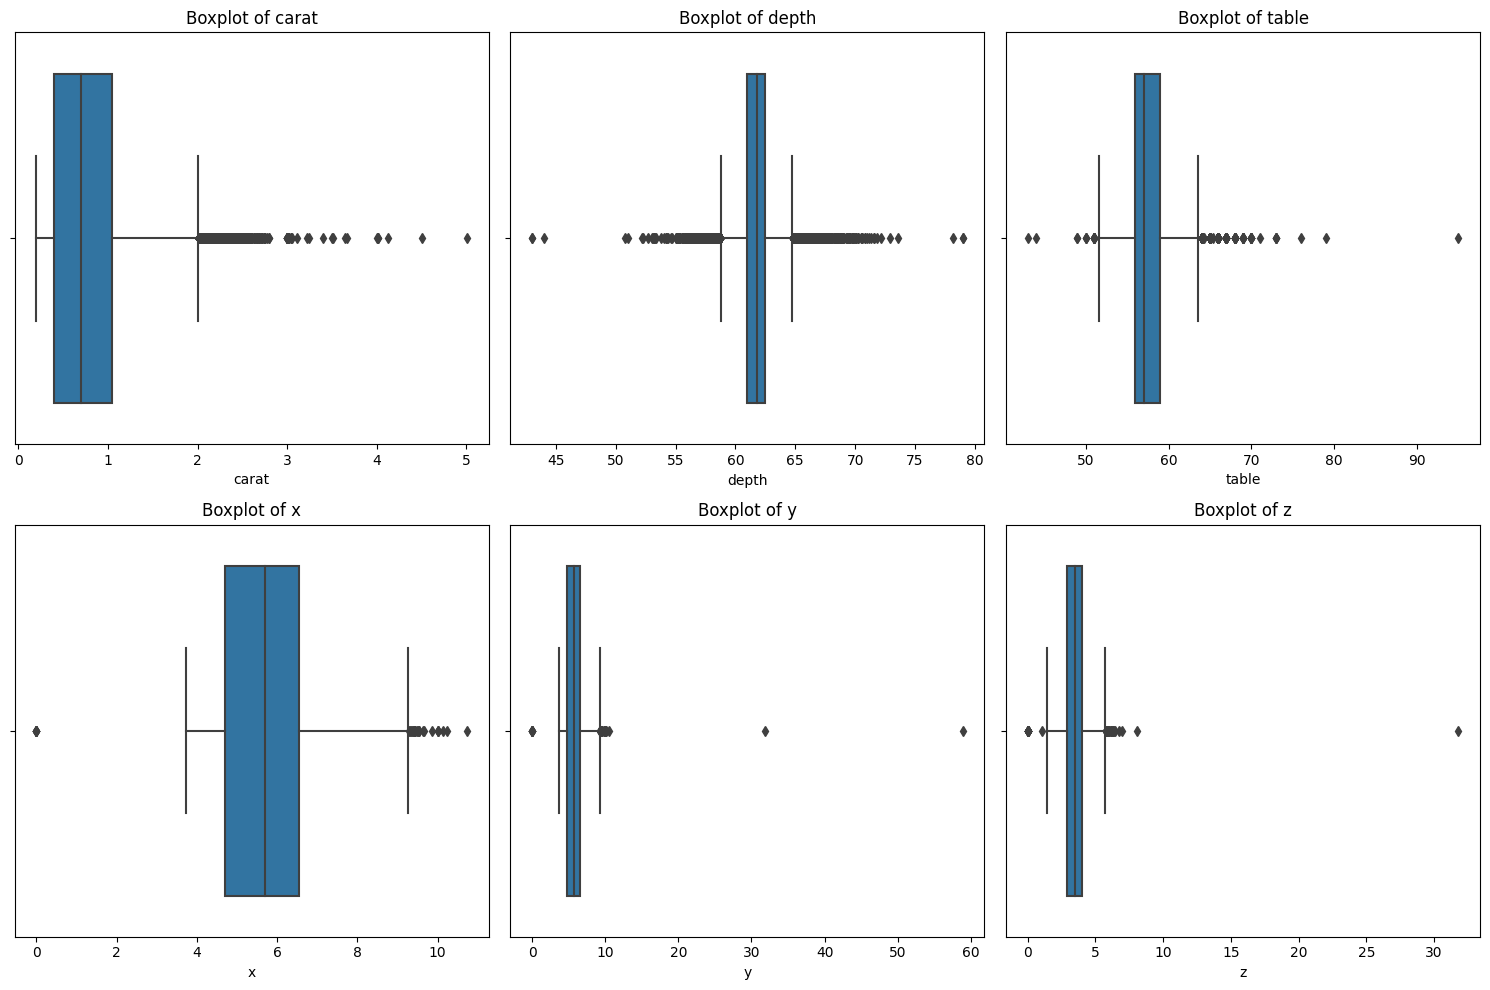

In [13]:
# Membuat subplot dengan 2 baris dan 3 kolom
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Memplot boxplot untuk masing-masing fitur numerical dalam subplot
for i, feature in enumerate(numerical_features):
    row, col = i // 3, i % 3
    sns.boxplot(x=df[feature], ax=axes[row, col])
    axes[row, col].set_title(f'Boxplot of {feature}')
    axes[row, col].set_xlabel(feature)

# Menyesuaikan tata letak subplot
plt.tight_layout()
plt.show()

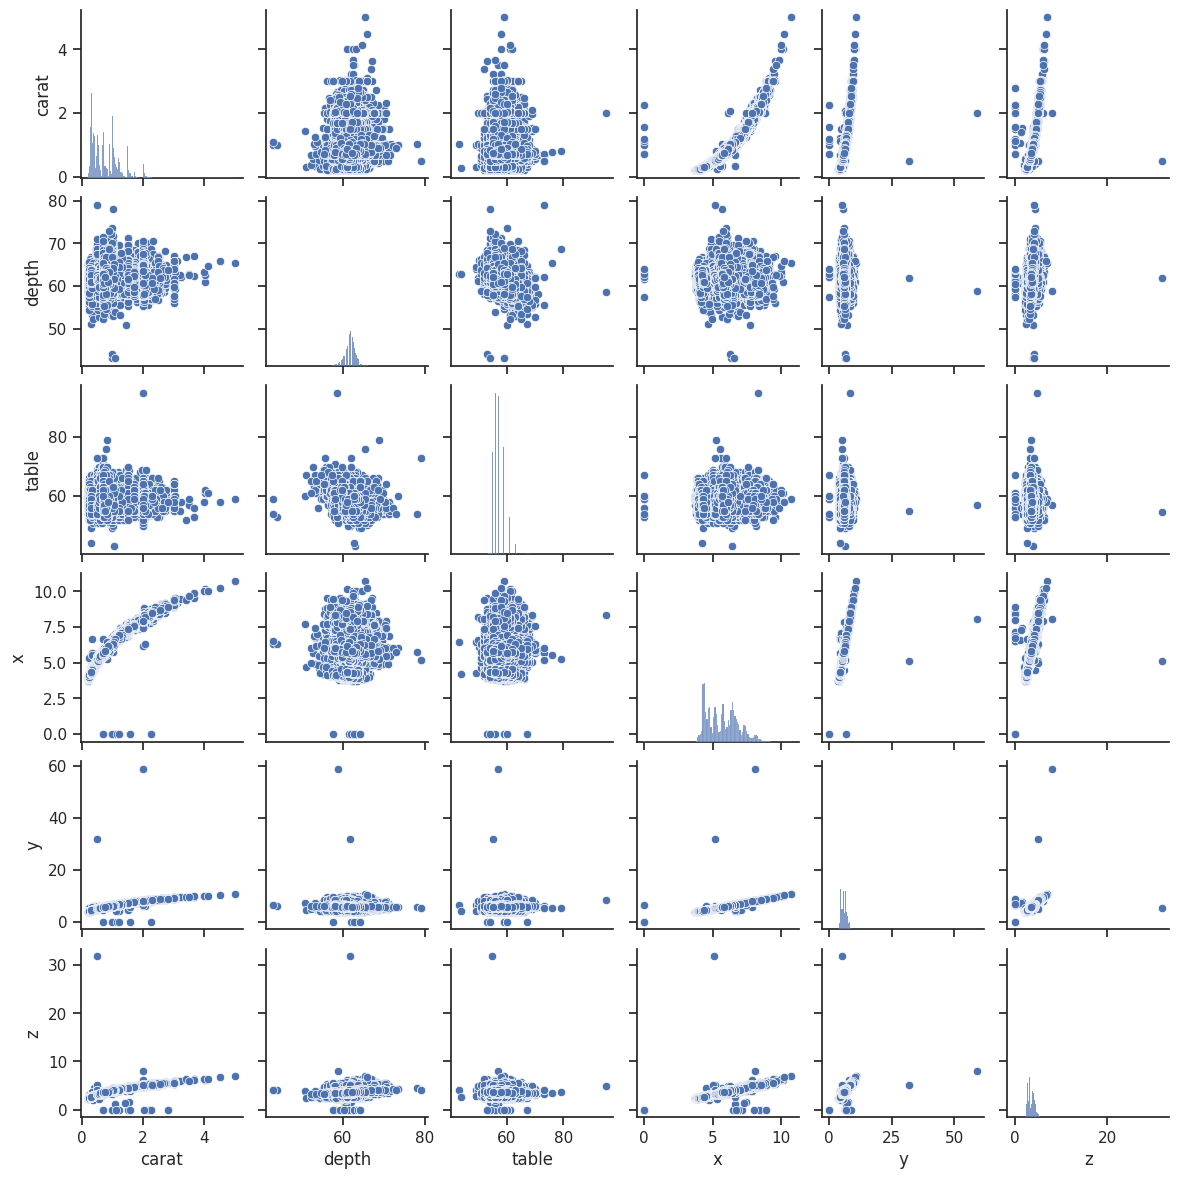

In [18]:
# Daftar numerical features
numerical_features = ['carat', 'depth', 'table', 'x', 'y', 'z']

# Membuat scatter plot untuk setiap pasangan fitur
sns.set(style="ticks")
sns.pairplot(df[numerical_features], height=2)
plt.show()


<ipython-input-19-991cb9dc3171>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



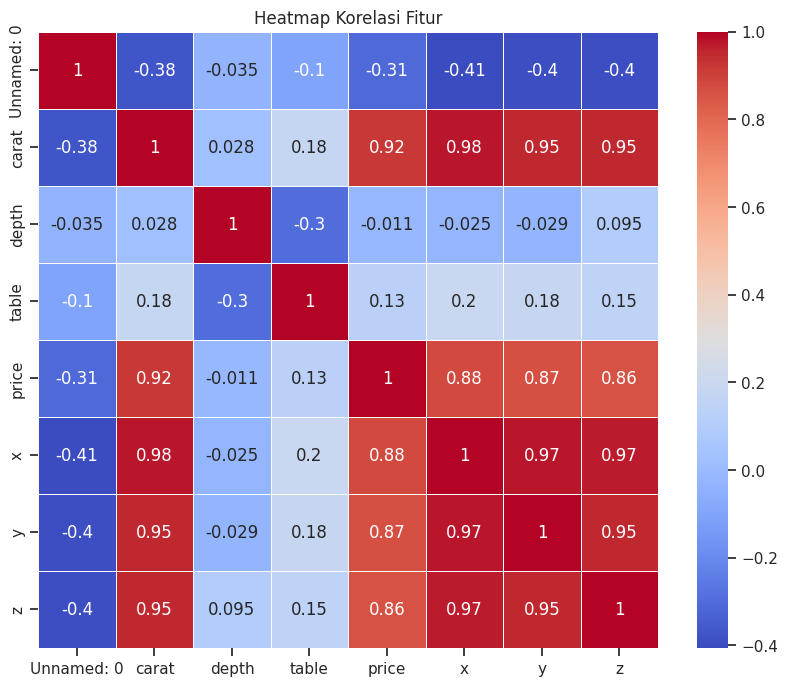

In [19]:
# Membuat matriks korelasi antara fitur-fitur
corr_matrix = df.corr()

# Membuat heatmap dari matriks korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap Korelasi Fitur')
plt.show()

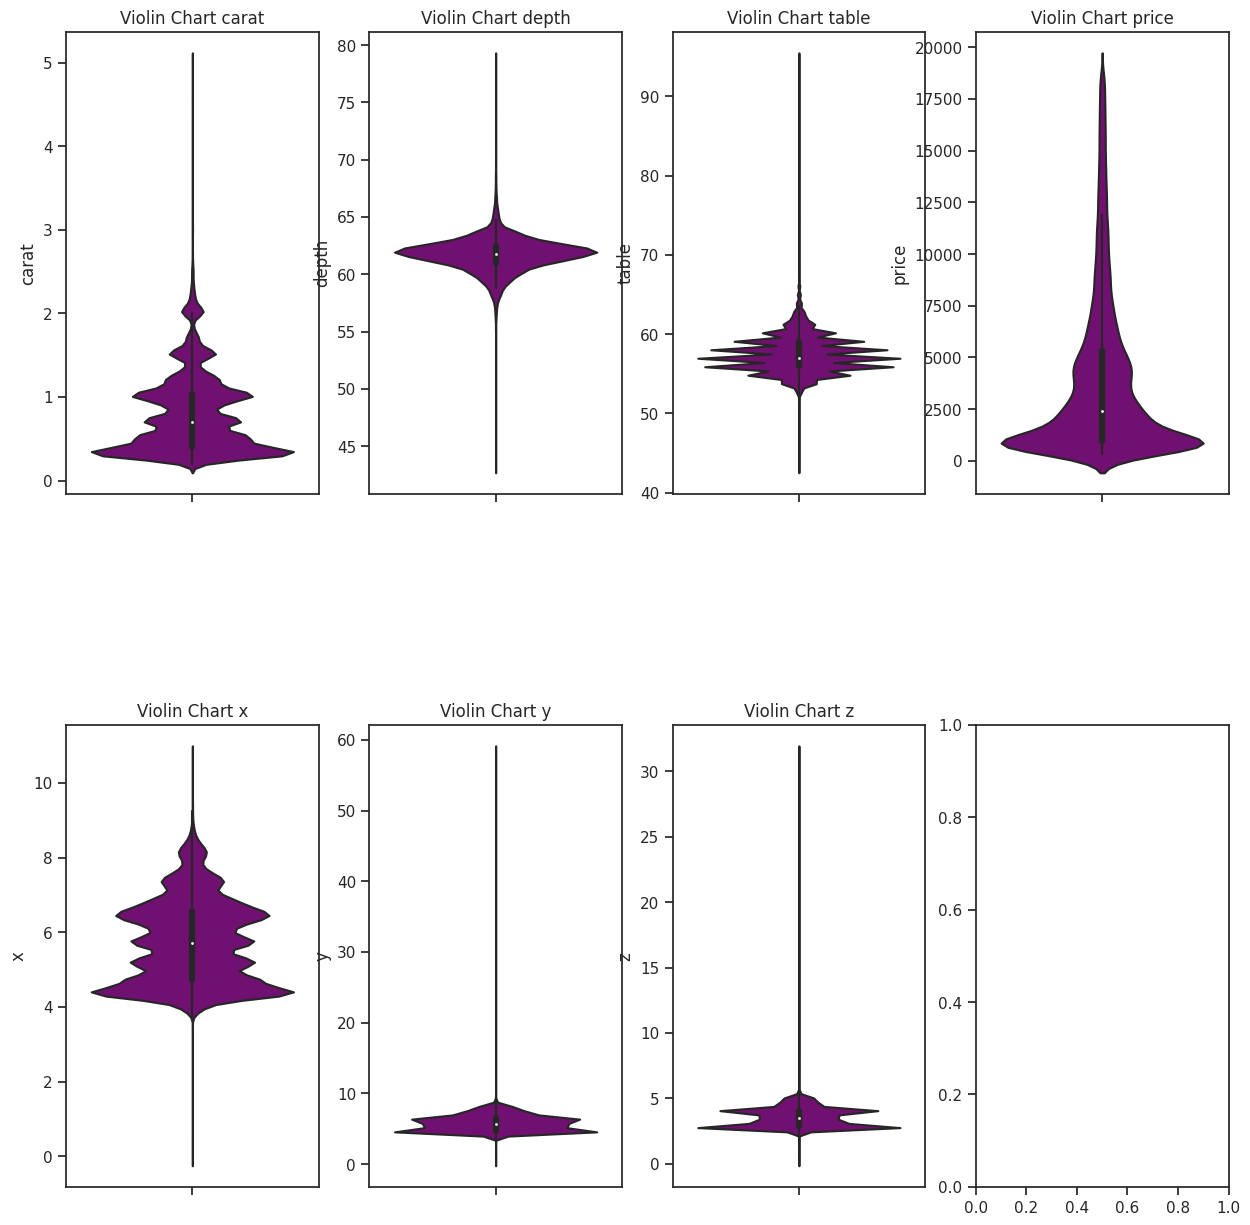

In [20]:
# Daftar fitur
fitur = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']

# Membuat subplot dengan 4 baris dan 2 kolom
fig, axes = plt.subplots(2, 4, figsize=(15, 15))
fig.subplots_adjust(hspace=0.5)

for i, feature in enumerate(fitur):
    row, col = divmod(i, 4)
    ax = axes[row, col]

    # Membuat violin chart dengan orientasi vertikal
    sns.violinplot(y=df[feature], ax=ax, color="purple")

    ax.set_title(f'Violin Chart {feature}')
    ax.set_ylabel(feature)
    ax.set_xlabel("")

plt.show()